# Logistic Regression

We trained several different machine learning models and compared them in order to find the best solution for our multi classification problem. This notebook contains the training of different machine learning models relying on the logistic regression algorithm. We trained models both on the combined and the separate cats and dogs data set. 

The contents on this notebook

 * Importing the necessary data
 * Default Logistic Regression Model
    * Combined Data Set
    * Separate Cats and Dogs Data Sets
 * Random Search for Hyperparameter Tuning of Logistic Regression Model
    * Combined Data Set
    * Separate Cats and Dogs Data Sets
 * Grid Search to further tune the hyperparameters from above
    * Combined Data Set
    * Separate Cats and Dogs Data Sets
* Polynomial Features to improve the Logistic Regression Model
    * Combined Data Set
    * Separate Cats and Dogs Data Sets
* Best Logistic Regression Model
* Addendum: Combining Adoption Speed Categories


In [1]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split 

# REMOVE?
#from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
# import to create polynomial features
from sklearn.preprocessing import PolynomialFeatures

# REMOVE?
# Scaling with Minmax-scaler
#from sklearn.preprocessing import MinMaxScaler

# from ydata_profiling import ProfileReport

# REMOVE?
# pd.set_option('display.max_rows', None)

from scipy.stats import loguniform

RSEED = 42

In [2]:
import sys
import os

# Get the parent directory
parent_dir = os.path.dirname(os.getcwd()) 
# Add the parent directory to sys.path
sys.path.append(parent_dir)
# import our custom metrics function and our custom scorer (Cohen's Kappa)
# import function showing metrics
from custom_functions import our_metrics
# import custom scorers
from custom_functions import get_kappa

## Importing the Data

In [3]:
# reading in the data sets (for distance based models with dropped first column during dummy creation in order to avoid collinearity)
X_test = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_minmax_scaled_dropped_first.csv', delimiter=',')
X_train = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_minmax_scaled_dropped_first.csv', delimiter=',')
y_test = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test.csv', delimiter=',')
y_train = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train.csv', delimiter=',')

In [4]:
# importing cat DataFrames
X_test_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_cats_dropped.csv', delimiter=',')
X_train_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_cats_dropped.csv', delimiter=',')
y_test_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test_cats.csv', delimiter=',')
y_train_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train_cats.csv', delimiter=',')

In [5]:
# importing dog DataFrames
X_test_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_dogs_dropped.csv', delimiter=',')
X_train_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_dogs_dropped.csv', delimiter=',')
y_test_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test_dogs.csv', delimiter=',')
y_train_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train_dogs.csv', delimiter=',')

In [6]:
# change format of y from dataframe to array
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)
y_train_cats = np.ravel(y_train_cats)
y_train_dogs = np.ravel(y_train_dogs)
y_test_cats = np.ravel(y_test_cats)
y_test_dogs = np.ravel(y_test_dogs)

## Predictive Modelling with a Default Logistic Regression

We start out with the default logistic regression model for the combined and separate cats and dogs data sets. We will later compare the relevant metric, Cohen's Kappa, with the results of different logistic regression models.

### Default Logistic Regression on the Combined Data Set

In [7]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3868
_____________________
Weighted Quadratic Kappa: 0.291


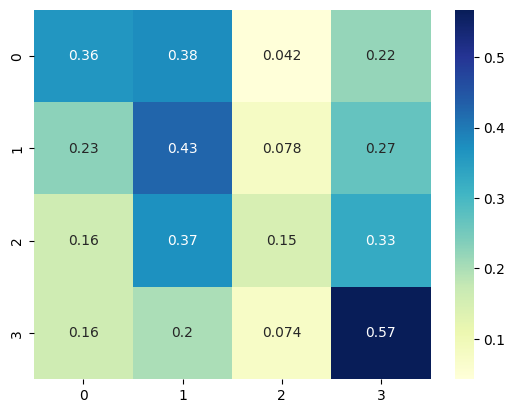

In [8]:
our_metrics(y_train, y_pred_train, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3938
_____________________
Weighted Quadratic Kappa: 0.2989


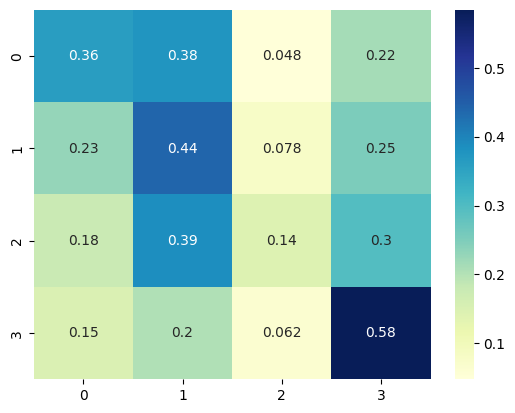

In [9]:
our_metrics(y_test, y_pred_test, normalize=True)

### Default Logistic Regression for Cats and Dogs Separately

In [10]:
# Logistic Regression
log_reg_cats = LogisticRegression(max_iter=1000)
log_reg_cats.fit(X_train_cats, y_train_cats)

log_reg_dogs = LogisticRegression(max_iter=1000)
log_reg_dogs.fit(X_train_dogs, y_train_dogs)

y_pred_train_cats = log_reg_cats.predict(X_train_cats)
y_pred_test_cats = log_reg_cats.predict(X_test_cats)

y_pred_train_dogs = log_reg_dogs.predict(X_train_dogs)
y_pred_test_dogs = log_reg_dogs.predict(X_test_dogs)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3814
_____________________
Weighted Quadratic Kappa: 0.2689


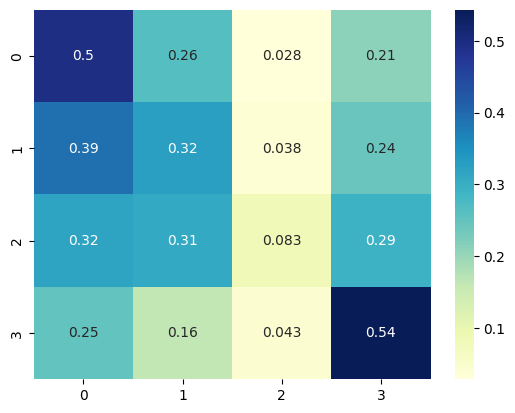

In [11]:
our_metrics(y_train_cats, y_pred_train_cats, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4035
_____________________
Weighted Quadratic Kappa: 0.3617


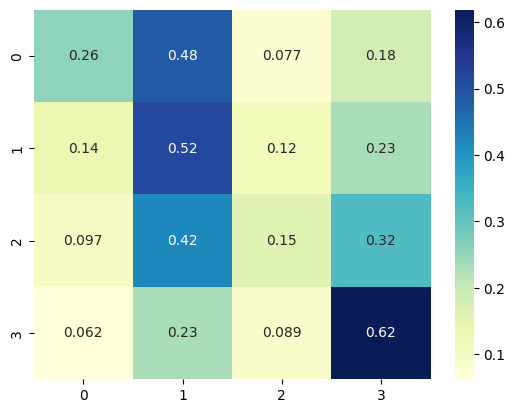

In [12]:
our_metrics(y_train_dogs, y_pred_train_dogs, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4029
_____________________
Weighted Quadratic Kappa: 0.2964


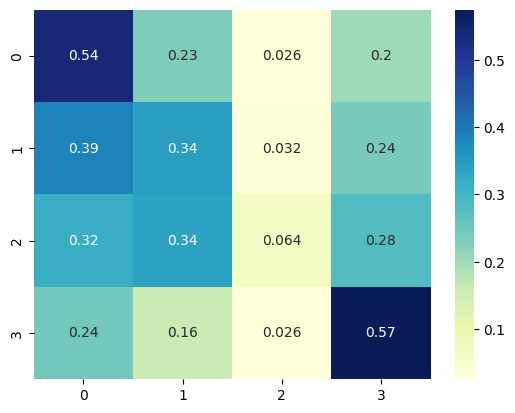

In [13]:
our_metrics(y_test_cats, y_pred_test_cats, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3992
_____________________
Weighted Quadratic Kappa: 0.3241


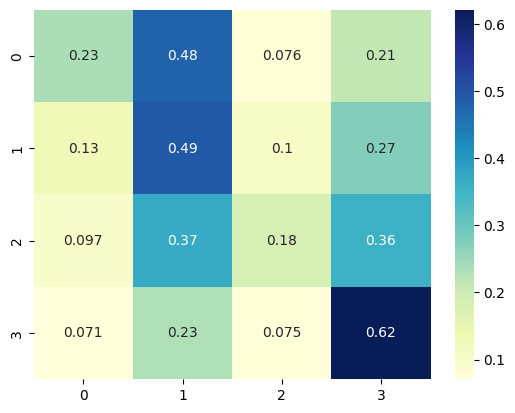

In [14]:
our_metrics(y_test_dogs, y_pred_test_dogs, normalize=True)

The best kappa score (on the test data) with a default logistic regression model was obtained for the separate dog dataset with a kappa score of 0.3241. Fort the combined data set, we obtained 0.2989, for the separate cat data set 0.2964. It is interesting to see that the combined model has a better score that the separate cat model, while the separate dog model outperforms the combined model.

## Hyperparameter Tuning with Quadratic Weighted Kappa Scorer with Random Search 

We will now conduct a Random Search to find parameters of the logistic regression algorithm that will improve the relevant metric, i.e., yield a higher Kappa Score. We will first take a look at the parameters that can be changed and decide on the ones included in the searched parameter grid.

In [15]:
#what parameters does LogisticRegression have?
log_reg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

### Hyperparameters of the LogisticRegression

- 'C' : float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
- 'class_weight' : dict or ‘balanced’, default=None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
- 'dual' : bool, default=False
Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.
- 'fit_intercept' : bool, default=True
Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
- 'intercept_scaling' : float, default=1
Useful only when the solver ‘liblinear’ is used and ...
- 'l1_ratio': float, default=None
The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.
- 'max_iter' : int, default=100
Maximum number of iterations taken for the solvers to converge
- 'multi_class': {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.
- n_jobs': int, default=None
- 'penalty' : {‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
- 'random_state' : int, RandomState instance, default=None
Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data.
- 'solver' : {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
‘liblinear’ is limited to one-versus-rest schemes.
‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.
Warning: The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
‘lbfgs’ - [‘l2’, None]
‘liblinear’ - [‘l1’, ‘l2’]
‘newton-cg’ - [‘l2’, None]
‘newton-cholesky’ - [‘l2’, None]
‘sag’ - [‘l2’, None]
‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]
- 'tol' : float, default=1e-4
Tolerance for stopping criteria.
- 'verbose' : int, default=0
For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.
- 'warm_start' : bool, default=False
When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. Useless for liblinear solver.

It is evident from their usage description that some parameters like dual, fit_intercept, interceept_scaling, max_iter, n_jobs, random_state, verbose, warm_start should not be changed or set to a specific value, i.e., they should not be included in the parameter grid. 

We decided on the following parameter grid, where a search was conducted both with a loguniform and a linspace for the inverse regularization weight C.

In [16]:
 # Define parameter grid for randomized search
param_grid = {'C' : loguniform(1e-5, 200),
#              'C' : np.linspace(0.1, 10, 50),
#              'l1_ratio' : np.linspace(0, 1, 20), 
              'penalty' : ['l1', 'l2', None],#, 'elasticnet'],
              'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
#              'class_weight' : ['balanced', None]
             }

### RandomSearch on the Combined Set

In [17]:
 # Define parameter grid for randomized search
param_grid_kappa = {#'C' : loguniform(1e-5, 200),
              'C' : np.linspace(0.1, 10, 50),
#              'l1_ratio' : np.linspace(0, 1, 20), 
              'penalty' : ['l1', 'l2', None],#, 'elasticnet'],
              'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
#              'class_weight' : ['balanced', None]
             }

In [18]:
# import the kappa scorers needed for the grid search
kappa_scorer = get_kappa()

In [19]:
# Instantiate random search and define the metric to optimize 
rs_kappa = RandomizedSearchCV(LogisticRegression(random_state=RSEED,max_iter=1000), param_grid_kappa, scoring=kappa_scorer,
                  cv=5, verbose=0, n_jobs=-1, n_iter=50, random_state=RSEED)

In [20]:
# Fit randomized search object to data
rs_kappa.fit(X_train, y_train)

/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admi

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857143,
        3.13061224,  3.33265306,  3.53469388,  3.73673469,  3.93877551,
        4.1...
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ]),
                                        'penalty': ['l1', 'l2', None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42,
                   scoring=make_scorer(cohen_kappa_score, weights=quadratic))

In [21]:
# Best score
print('Best score:', round(rs_kappa.best_score_, 3))

# Best parameters
print('Best parameters:', rs_kappa.best_params_)

Best score: 0.287
Best parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.3020408163265306}


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.389
_____________________
Weighted Quadratic Kappa: 0.2903


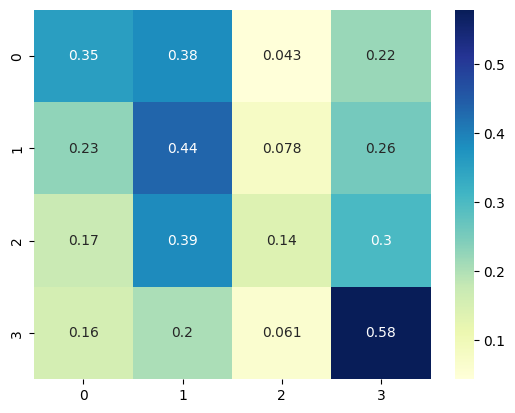

In [22]:
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_rs_kappa
log_reg_best_rs_kappa = rs_kappa.best_estimator_

# Making predictions on the test set
y_pred_test_rs_kappa = log_reg_best_rs_kappa.predict(X_test)

# Let us print out the performance of our model on the test set.
our_metrics(y_test, y_pred_test_rs_kappa, normalize=True)

In [23]:
# y_pred_train_rs_kappa = log_reg_best_rs_kappa.predict(X_train)
# our_metrics(y_train, y_pred_train_rs_kappa, normalize=True)

### Kappa Scorer for Cats and Dogs Separately

In [30]:
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#### Hyperparameter Tuning for Cats

In [31]:
# define evaluation
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#multi_class=‘auto’/‘multinomial’ multi_class='multinomial'
# Instantiate random search and define the metric to optimize 
rs_cats_kappa = RandomizedSearchCV(LogisticRegression(random_state=RSEED,max_iter=1000), param_grid_kappa, scoring=kappa_scorer,
                  cv=5, verbose=0, n_jobs=-1, n_iter=40, random_state=RSEED)#cv=5

In [32]:
# Fit randomized search object to data
rs_cats_kappa.fit(X_train_cats, y_train_cats)

/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admi

/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Volumes/Data/Document

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'C': array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857143,
        3.13061224,  3.33265306,  3.53469388,  3.73673469,  3.93877551,
        4.1...
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ]),
                                        'penalty': ['l1', 'l2', None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42,
                   scoring=make_scorer(cohen_kappa_score, weights=quadratic))

In [33]:
# Best score
print('Best score:', round(rs_cats_kappa.best_score_, 3))

# Best parameters
print('Best parameters:', rs_cats_kappa.best_params_)

Best score: 0.261
Best parameters: {'solver': 'newton-cholesky', 'penalty': None, 'C': 2.5244897959183676}


In [34]:
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_rs
log_reg_best_rs_cats_kappa = rs_cats_kappa.best_estimator_

# Making predictions on the test set
y_pred_test_rs_cats_kappa = log_reg_best_rs_cats_kappa.predict(X_test_cats)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.407
_____________________
Weighted Quadratic Kappa: 0.2933


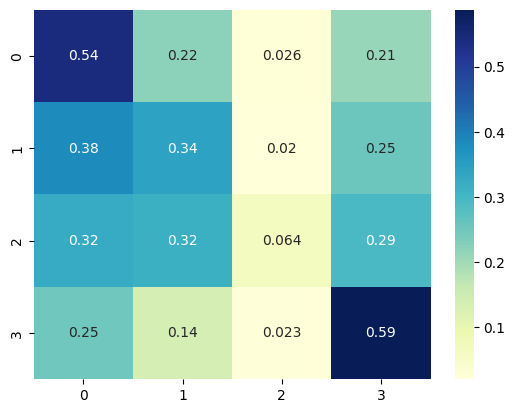

In [35]:
# Let us print out the performance of our model on the test set.
our_metrics(y_test_cats, y_pred_test_rs_cats_kappa, normalize=True)

#### Hyperparameter Tuning for Dogs

In [36]:
# Instantiate random search and define the metric to optimize 
rs_dogs_kappa = RandomizedSearchCV(LogisticRegression(random_state=RSEED,max_iter=1000), param_grid_kappa, scoring=kappa_scorer,
                  cv=cv, verbose=0, n_jobs=-1, n_iter=40, random_state=RSEED)
# Fit randomized search object to data
rs_dogs_kappa.fit(X_train_dogs, y_train_dogs)

/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admi

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'C': array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857...
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ]),
                                        'penalty': ['l1', 'l2', None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42,
                   scoring=make_scorer(cohen_kappa_score, weights=quadratic))

In [37]:
# Best score
print('Best score:', round(rs_dogs_kappa.best_score_, 3))

# Best parameters
print('Best parameters:', rs_dogs_kappa.best_params_)

Best score: 0.36
Best parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.3020408163265306}


In [38]:
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_rs_dogs_kappa
log_reg_best_rs_dogs_kappa = rs_dogs_kappa.best_estimator_

In [39]:
# Making predictions on the test set
y_pred_test_rs_dogs_kappa = log_reg_best_rs_dogs_kappa.predict(X_test_dogs)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4046
_____________________
Weighted Quadratic Kappa: 0.3296


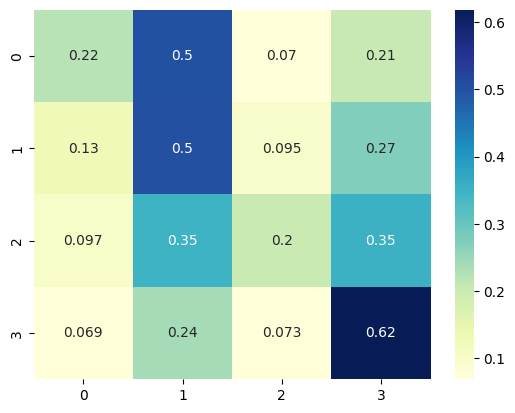

In [40]:
# Let us print out the performance of our model on the test set.
our_metrics(y_test_dogs, y_pred_test_rs_dogs_kappa, normalize=True)

We conducted the random search with both log and linear spaces in the searched parameter grid. With the status of this notebook, the best kappa score (on the test data) with a via random search hypertuned logistic regression model was obtained for the separate dog dataset with a kappa score of 0.3296. Fort the combined data set, we obtained 0.2903, for the separate cat data set 0.2933.

## GridSearch

We conduct a Grid Search in order to try and optimize the Kappa Score obtained by the model with the best parameters found via Random Search even more.

In [41]:
# Defining parameter grid (as dictionary)
# default logistic regression: : C=1 , penalty l2, solver='lbfgs'
param_grid_gs = {"C" : [0.2, 0.5, 1, 2, 5, 10, 15, 20],
              "penalty" : ["l2", "l1", None],
              'solver' : ['lbfgs', 'saga', 'liblinear', 'newton-cholesky'],
#              'class_weight' : ['balanced', None]
             }

### GridSearch with Kappa-Scorer on the Combined Data Set

In [42]:
# Instantiate gridsearch and define the metric to optimize 
gs_comb_kappa = GridSearchCV(LogisticRegression(random_state=RSEED), param_grid_gs, scoring=kappa_scorer,
                  cv=5, verbose=0, n_jobs=-1)

In [43]:
# Fit gridsearch object to data.. also lets see how long it takes
gs_comb_kappa.fit(X_train, y_train)
# Best score
print('Best score:', round(gs_comb_kappa.best_score_, 3))

# Best parameters
print('Best parameters:', gs_comb_kappa.best_params_)

/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penal

Best score: 0.287
Best parameters: {'C': 0.5, 'penalty': 'l1', 'solver': 'saga'}


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3914
_____________________
Weighted Quadratic Kappa: 0.2968


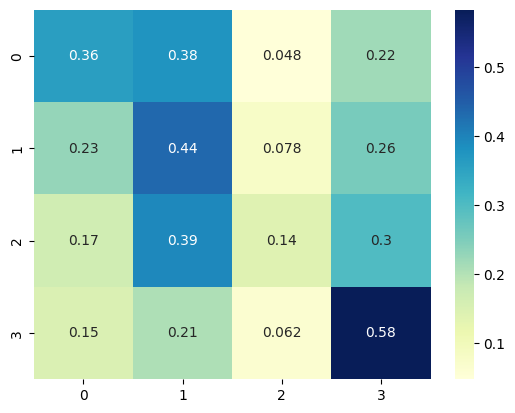

In [44]:
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_gs_comb_kappa
log_reg_best_gs_comb_kappa = gs_comb_kappa.best_estimator_
# Making predictions on the test set
y_pred_test_gs_comb_kappa = log_reg_best_gs_comb_kappa.predict(X_test)
our_metrics(y_test, y_pred_test_gs_comb_kappa, normalize=True)

### GridSearch on separate Cats and Dogs Data Sets

In [45]:
# Instantiate gridsearch and define the metric to optimize 
gs_cats_kappa = GridSearchCV(LogisticRegression(random_state=RSEED), param_grid_gs, scoring=kappa_scorer,
                  cv=5, verbose=0, n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
gs_cats_kappa.fit(X_train_cats, y_train_cats)

/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admi

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.2, 0.5, 1, 2, 5, 10, 15, 20],
                         'penalty': ['l2', 'l1', None],
                         'solver': ['lbfgs', 'saga', 'liblinear',
                                    'newton-cholesky']},
             scoring=make_scorer(cohen_kappa_score, weights=quadratic))

In [46]:
# Best score
print('Best score:', round(gs_cats_kappa.best_score_, 3))

# Best parameters
print('Best parameters:', gs_cats_kappa.best_params_)
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_rs_kappa
log_reg_best_gs_cats_kappa = gs_cats_kappa.best_estimator_

Best score: 0.261
Best parameters: {'C': 0.2, 'penalty': None, 'solver': 'newton-cholesky'}


In [47]:
# Making predictions on the test set
y_pred_test_gs_cats_kappa = log_reg_best_gs_cats_kappa.predict(X_test_cats)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.407
_____________________
Weighted Quadratic Kappa: 0.2933


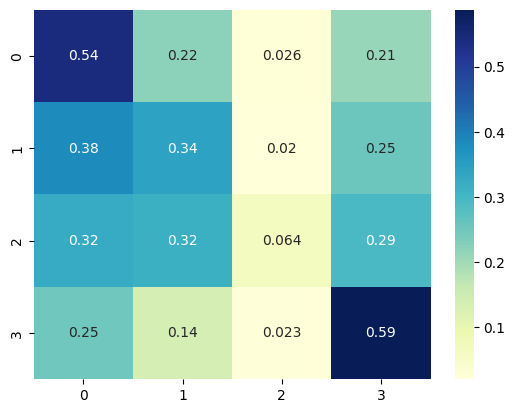

In [48]:
our_metrics(y_test_cats, y_pred_test_gs_cats_kappa, normalize=True)

In [49]:
# Instantiate gridsearch and define the metric to optimize 
gs_dogs_kappa = GridSearchCV(LogisticRegression(random_state=RSEED), param_grid_gs, scoring=kappa_scorer,
                  cv=5, verbose=0, n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
gs_dogs_kappa.fit(X_train_dogs, y_train_dogs)

/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admin/Lana/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Volumes/Data/Documents/Admi

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.2, 0.5, 1, 2, 5, 10, 15, 20],
                         'penalty': ['l2', 'l1', None],
                         'solver': ['lbfgs', 'saga', 'liblinear',
                                    'newton-cholesky']},
             scoring=make_scorer(cohen_kappa_score, weights=quadratic))

In [50]:
# Best score
print('Best score:', round(gs_dogs_kappa.best_score_, 3))

# Best parameters
print('Best parameters:', gs_dogs_kappa.best_params_)

Best score: 0.365
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [51]:
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_gs_dogs_kappa
log_reg_best_gs_dogs_kappa = gs_dogs_kappa.best_estimator_

In [52]:
# Making predictions on the test set
y_pred_test_gs_dogs_kappa = log_reg_best_gs_dogs_kappa.predict(X_test_dogs)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3998
_____________________
Weighted Quadratic Kappa: 0.3244


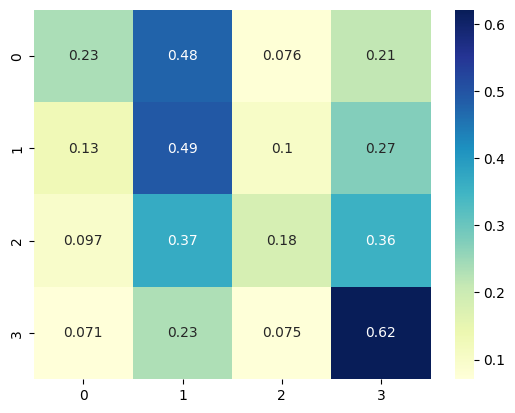

In [53]:
our_metrics(y_test_dogs, y_pred_test_gs_dogs_kappa, normalize=True)

We conducted a grid search. With the status of this notebook, the best kappa score (on the test data) with a via grid search hypertuned logistic regression model was obtained for the separate dog dataset with a kappa score of 0.3244. Fort the combined data set, we obtained 0.2968, for the separate cat data set 0.2933.

## Polynomial Features

We will now allow for polynomial features of degree 2. This is a further approach that might improve the kappa score.

In [54]:
# here we will add the second degree polynomial features
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

model_poly = LogisticRegression(max_iter=1000)
model_poly.fit(X_poly_train, y_train)
y_pred_poly_test = model_poly.predict(X_poly_test)
y_pred_poly_train = model_poly.predict(X_poly_train)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4195
_____________________
Weighted Quadratic Kappa: 0.3535


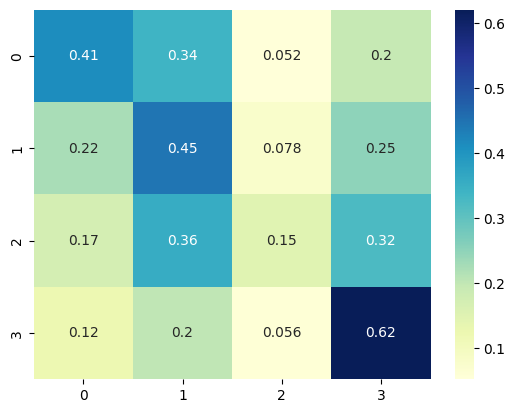

In [55]:
our_metrics(y_train, y_pred_poly_train, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4046
_____________________
Weighted Quadratic Kappa: 0.341


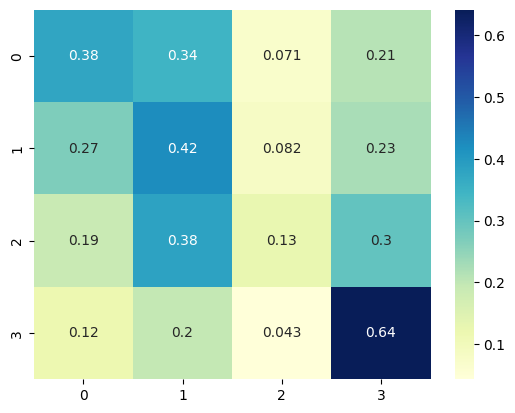

In [56]:
our_metrics(y_test, y_pred_poly_test, normalize=True)

We see that including polynomial features increases the kappa score, already for the default logistic regression.

### Polynomial Features for Cats and Dogs separately

In [57]:
# here we will add the second degree polynomial features
polynomial_features_cats = PolynomialFeatures(degree=2, include_bias=False)
polynomial_features_dogs = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train_cats = polynomial_features.fit_transform(X_train_cats)
X_poly_test_cats = polynomial_features.transform(X_test_cats)
X_poly_train_dogs = polynomial_features.fit_transform(X_train_dogs)
X_poly_test_dogs = polynomial_features.transform(X_test_dogs)

In [58]:
model_poly_cats = LogisticRegression(max_iter=1000)
model_poly_cats.fit(X_poly_train_cats, y_train_cats)

LogisticRegression(max_iter=1000)

In [59]:
y_pred_poly_cats_test = model_poly_cats.predict(X_poly_test_cats)
y_pred_poly_cats_train = model_poly_cats.predict(X_poly_train_cats)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4262
_____________________
Weighted Quadratic Kappa: 0.3314


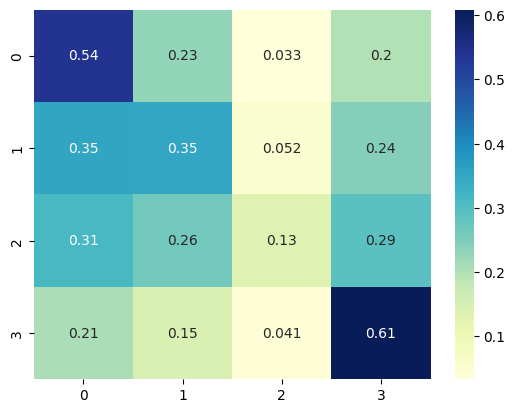

In [60]:
our_metrics(y_train_cats, y_pred_poly_cats_train, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3956
_____________________
Weighted Quadratic Kappa: 0.2994


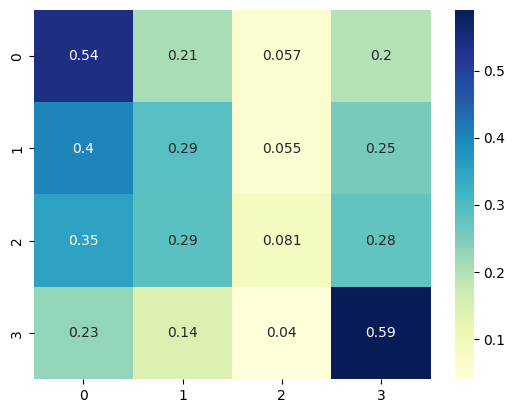

In [61]:
our_metrics(y_test_cats, y_pred_poly_cats_test, normalize=True)

In [62]:
model_poly_dogs = LogisticRegression(max_iter=1000)
model_poly_dogs.fit(X_poly_train_dogs, y_train_dogs)
y_pred_poly_dogs_test = model_poly_dogs.predict(X_poly_test_dogs)
y_pred_poly_dogs_train = model_poly_dogs.predict(X_poly_train_dogs)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4402
_____________________
Weighted Quadratic Kappa: 0.3942


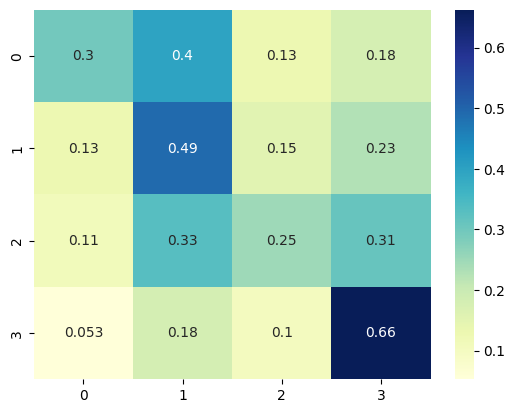

In [63]:
our_metrics(y_train_dogs, y_pred_poly_dogs_train, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3961
_____________________
Weighted Quadratic Kappa: 0.3412


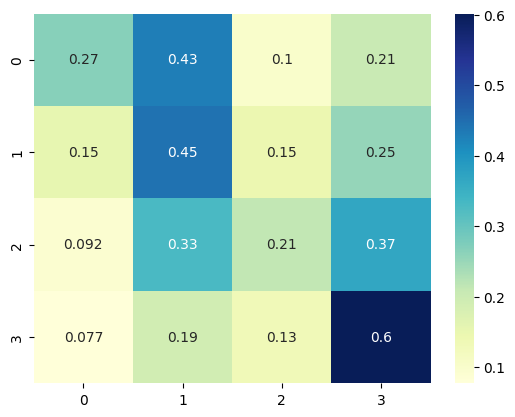

In [64]:
our_metrics(y_test_dogs, y_pred_poly_dogs_test, normalize=True)

With the status of this notebook, the best kappa score (on the test data) with polynomial features in the default logistic regression model was obtained for the separate dog dataset with a kappa score of 0.3412. Fort the combined data set, we obtained 0.3410, for the separate cat data set 0.2994. Note that comparing the results on train and test data also reveals that these models, as can be expected, are more prone to overfitting.

## Best Models

Comparing the different models, we see that with regard to the kappa score, the following models perform best with the given scores on the test data set:

* Cats data : Default LogisticRegression;  Accuracy = 40.29 % and kappa = 0.2964
* Dogs data : LogisticRegression with PolynomialFeatures; Accuracy 39.55 % and kappa = 0.3413
* Combined Data : LogisticRegression with PolynomialFeatures; Accuracy 40.42 % and kappa = 0.341

At this point, comparing the results of our so far trained different models showed that a different modeel would outperform the logistic regression model. Otherwise, combining hypertuning and polynomial features would have been the next step.

## Addendum: Combining Target Categories

### Splitting Cats and Dogs, Combine Target 2 & 3

The idea arose during our model training that the models might benefit from combining target adoption speeds 2 and 3 since looking at the confusion matrices reveals that they seem to be difficult to distinguish. Combining Targets 2 and 3 did not turn out to be helpful, however: For LogisticRegression, combining the middle two categories creates imbalanced data problems (the middle category then is represented twice as often as the other two, roughly), which makes the model lean towards predicting the middle category. I.e., performance on target 1 and 4 observation suffers when combining targets 2 and 3. To make up for this, imbalanced data approaches would have to be employed. For Logistic Regression, we will not pursue this any further but rather stick with 4 target categories.
Caveat: Be aware that we cannot directly compare the kappa scores of this combined model to the ones of the previous models with four target classes, since "being three classes off" in predictions cannot occur anymore.

In [65]:
# combine Target 2 and 3
y_train_cats_comb = [x -1 if x >= 3 else x for x in y_train_cats]
y_test_cats_comb = [x -1 if x >= 3 else x for x in y_test_cats]
y_train_dogs_comb = [x -1 if x >= 3 else x for x in y_train_dogs]
y_test_dogs_comb = [x -1 if x >= 3 else x for x in y_test_dogs]

In [66]:
# print(np.unique(y_test_dogs_comb, return_counts=True))
# print(np.unique(y_test_cats_comb, return_counts=True))

In [67]:
# Logistic Regression
log_reg_cats_comb = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_cats_comb.fit(X_train_cats, y_train_cats_comb)

log_reg_dogs_comb = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_dogs_comb.fit(X_train_dogs, y_train_dogs_comb)

y_pred_train_cats_comb = log_reg_cats_comb.predict(X_train_cats)
y_pred_test_cats_comb = log_reg_cats_comb.predict(X_test_cats)

y_pred_train_dogs_comb = log_reg_dogs_comb.predict(X_train_dogs)
y_pred_test_dogs_comb = log_reg_dogs_comb.predict(X_test_dogs)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4416
_____________________
Weighted Quadratic Kappa: 0.2702


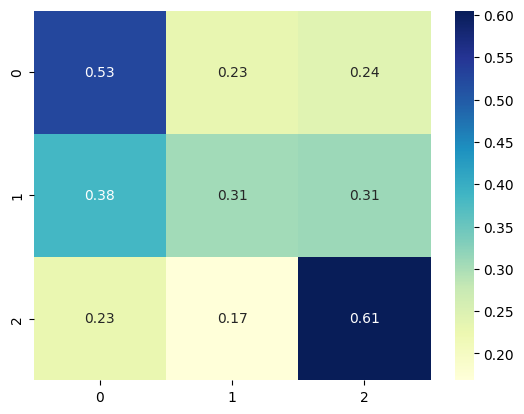

In [68]:
# train data
our_metrics(y_train_cats_comb, y_pred_train_cats_comb, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4815
_____________________
Weighted Quadratic Kappa: 0.3413


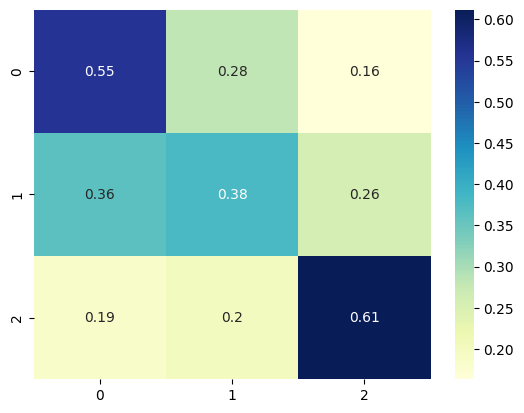

In [69]:
our_metrics(y_train_dogs_comb, y_pred_train_dogs_comb, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4733
_____________________
Weighted Quadratic Kappa: 0.305


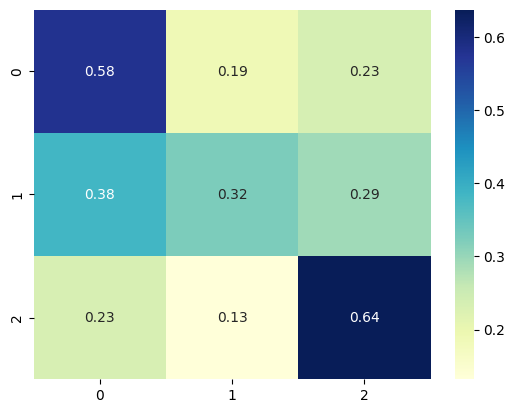

In [70]:
# test data
our_metrics(y_test_cats_comb, y_pred_test_cats_comb, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4698
_____________________
Weighted Quadratic Kappa: 0.3101


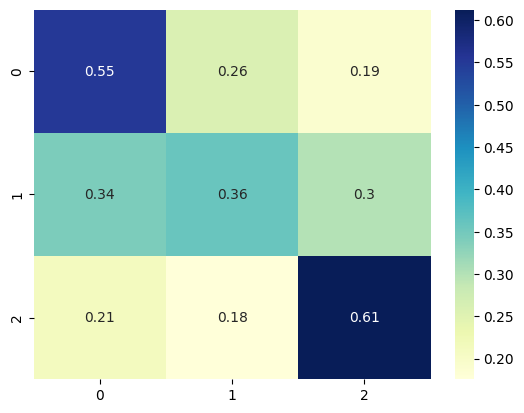

In [71]:
our_metrics(y_test_dogs_comb, y_pred_test_dogs_comb, normalize=True)

### All or Nothing: Adopted vs. Not Adopted

For completeness sake, we also tried combining the first three adoption speeds ("adopted") vs. the last adoption speed ("not adopted"). As anticipated by the previous try, this did not improve the outcome.

In [72]:
# combine Target 2 and 3
y_train_cats_comb2 = [0 if x <= 3 else 1 for x in y_train_cats]
y_test_cats_comb2 = [0 if x <= 3 else 1 for x in y_test_cats]
y_train_dogs_comb2 = [0 if x <= 3 else 1 for x in y_train_dogs]
y_test_dogs_comb2 = [0 if x <= 3 else 1 for x in y_test_dogs]
y_train_comb2 = [0 if x <= 3 else 1 for x in y_train]
y_test_comb2 = [0 if x <= 3 else 1 for x in y_test]

In [73]:
log_reg_comb2 = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_comb2.fit(X_train, y_train_comb2)

y_pred_train_comb2 = log_reg_comb2.predict(X_train)
y_pred_test_comb2 = log_reg_comb2.predict(X_test)

In [74]:

# print(np.unique(y_test_dogs_comb2, return_counts=True))
# print(np.unique(y_test_cats_comb2, return_counts=True))
# Logistic Regression
log_reg_cats_comb2 = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_cats_comb2.fit(X_train_cats, y_train_cats_comb2)

log_reg_dogs_comb2 = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_dogs_comb2.fit(X_train_dogs, y_train_dogs_comb2)

y_pred_train_cats_comb2 = log_reg_cats_comb2.predict(X_train_cats)
y_pred_test_cats_comb2 = log_reg_cats_comb2.predict(X_test_cats)

y_pred_train_dogs_comb2 = log_reg_dogs_comb2.predict(X_train_dogs)
y_pred_test_dogs_comb2 = log_reg_dogs_comb2.predict(X_test_dogs)

In [75]:
# train data
#our_metrics(y_train_cats_comb2, y_pred_train_cats_comb2, normalize=True)

In [76]:
#our_metrics(y_train_dogs_comb2, y_pred_train_dogs_comb2, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.6934
_____________________
Weighted Quadratic Kappa: 0.3231


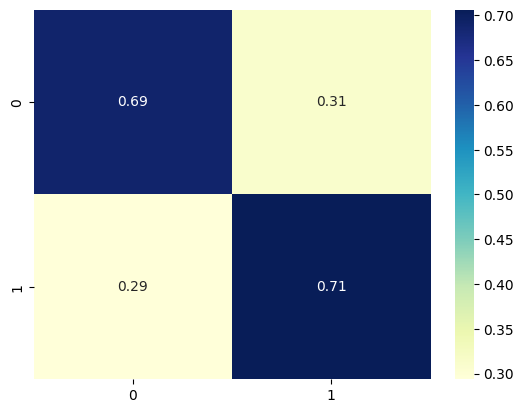

In [77]:
# test data
our_metrics(y_test_cats_comb2, y_pred_test_cats_comb2, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.6896
_____________________
Weighted Quadratic Kappa: 0.3098


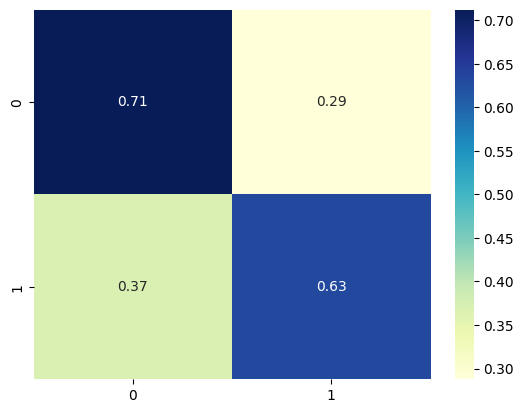

In [78]:
our_metrics(y_test_dogs_comb2, y_pred_test_dogs_comb2, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.6808
_____________________
Weighted Quadratic Kappa: 0.2898


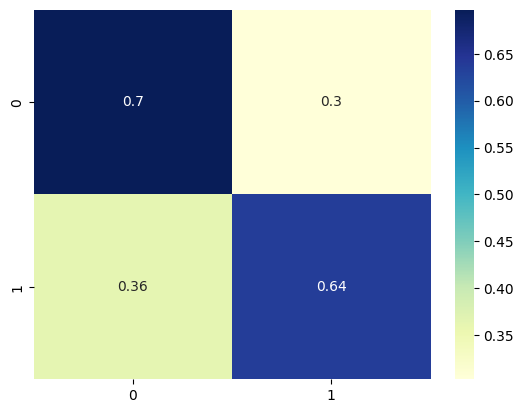

In [79]:
our_metrics(y_test_comb2, y_pred_test_comb2, normalize=True)

In [80]:
feat_imp_cats = pd.DataFrame(
    data= np.transpose(log_reg_cats_comb2.coef_) , 
    index=X_train_cats.columns.to_list(), 
    columns=['feature_importance']
    )
feat_imp_cats = feat_imp_cats.reindex(feat_imp_cats.feature_importance.abs().sort_values(ascending=False).index)
feat_imp_cats

,feature_importance
age_bin,2.411982
description_char,-1.387732
photoamt_11,-1.323698
maturitysize_3,-1.173993
furlength_2,-1.114939
health_2,0.907136
sterilized,-0.453483
fee_bin,0.413685
maturitysize_2,-0.338038
health_1,0.262129


In [81]:
feat_imp_dogs = pd.DataFrame(data= np.transpose(log_reg_dogs_comb2.coef_) , index=X_train_dogs.columns.to_list(), columns=['feature_importance'])
feat_imp_dogs.reindex(feat_imp_dogs.feature_importance.abs().sort_values(ascending=False).index)

,feature_importance
age_bin,2.427793
breed_type,2.061557
maturitysize_3,-1.752525
photoamt_11,-1.447790
description_char,-0.963487
furlength_2,-0.828092
health_1,0.534722
health_2,0.509971
sterilized,-0.459799
fee_bin,0.297381
